# Import libraries

In [1]:
!pip install category_encoders

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

# Scikit-learn: Basics & Evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.base import BaseEstimator, TransformerMixin

# Scikit-learn: Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline as SklearnPipeline
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Scikit-learn: Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

# Class Imbalance Handling
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

# Additional Libraries
from category_encoders import TargetEncoder

warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', 1000)        # Show table width
pd.set_option('display.max_colwidth', None) # Show full content of each column
pd.set_option('display.max_rows', None)

In [4]:
TeamID = 6
np.random.seed(TeamID)

# 1. Exploratory Data Analysis - EDA

## 1.1 Data Structure

### Import data

In [5]:
URL_DATA = 'https://raw.githubusercontent.com/trieuhaivo/cap5771-project/refs/heads/main/t06_data.csv'

DATA_FILENAME = 't06_data.csv'

!wget -O $DATA_FILENAME $URL_DATA

zsh:1: command not found: wget


In [6]:
df = pd.read_csv('t06_data.csv')


In [7]:
df.head()

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
0,wm_43236028,Petite Carrots,Walmart,produce-beans-wf,Produce Unbranded,0,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000
1,tg_81910537,Dill-licious Salad Bowl - 5.75oz - Good &#38; Gather&#8482;,Target,produce-packaged,Good & Gather,3,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479
2,wm_909761483,"Zatarain's Cheddar Jalapeno Cornbread Mix, 12.5 oz",Walmart,baking,Zatarain's,3,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000
3,wf_icelandic-provisions-coconut-with-almonds-skyr-yogurt-44-oz-b089n69zkg,"Coconut With Almonds Skyr Yogurt, 4.4 oz",WholeFoods,dairy-yogurt-drink,Icelandic Provisions,3,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408
4,tg_47981869,Alaska Grains Kodiak Wheat Bread - 24oz,Target,bread,Alaska Grains Baking Company,3,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000


In [8]:
df.tail()

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
16619,wf_365-by-whole-foods-market-organic-yellow-corn-tortilla-rounds-salted-12-oz-b07dwcvn6c,"Organic Yellow Corn Tortilla Rounds Salted, 12 oz",WholeFoods,snacks-chips,365 by Whole Foods Market,3,2.99,0.001661,340.19400,7.054798,28.219193,63.493183,0.0000,7.054798,0.000000,0.001411,0.176370,0.000000,1.763700
16620,wm_13023471,"Great Value Tomato 100% Juice, 64 fl oz",Walmart,drink-juice,Great Value,2,1.94,0.004850,1920.00000,0.833333,0.000000,3.708333,2.5000,0.833333,0.021667,0.000300,0.234500,0.000000,0.000000
16621,wf_365-by-whole-foods-market-organic-shelfstable-lemonade-mango-64-fl-oz-b074h6r5zf,"Organic Shelf-Stable Lemonade, Mango, 64 fl oz",WholeFoods,drink-juice,365 by Whole Foods Market,3,3.29,0.005141,1920.00000,0.000000,0.000000,5.250000,8.7500,0.000000,0.000000,0.000000,0.012500,0.000000,0.000000
16622,wm_10402753,"Hillshire Farm¬Æ Ultra Thin Sliced Smoked Ham Deli Meat, 9 oz",Walmart,meat-packaged,Hillshire Farm,3,3.28,0.012148,255.14550,15.873296,4.409249,1.569693,1.7637,0.000000,0.000000,0.000635,0.742341,0.044092,1.763700
16623,wf_milkman-instant-lowfat-dry-milk-344-oz-b0733p3z93,"Instant Lowfat Dry Milk, 3.44 oz",WholeFoods,milk-milk-substitute,Milkman,0,2.39,0.006257,97.52228,33.333333,5.833333,59.000000,50.0000,0.000000,1.125000,0.000000,0.448500,0.037500,3.333333


In [9]:
df.sample(5)

,original_ID,name,store,food category,brand,f_FPro_class,price,price percal,package_weight,Protein,Total Fat,Carbohydrate,"Sugars, total","Fiber, total dietary",Calcium,Iron,Sodium,Cholesterol,"Fatty acids, total saturated"
5438,tg_13156217,Barilla ProteinPLUS Multigrain Penne Pasta - 14.5oz,Target,pasta-noodles,Barilla,0,2.49,0.001808,411.06775,17.636995,1.763700,40.212349,3.527399,8.818498,0.028219,0.003527,0.00000,0.0,0.000000
8050,wf_larabar-cherry-pie-17-oz-b005p0i55c,"Cherry Pie , 1.7 oz",WholeFoods,snacks-bars,Larabar,3,1.39,0.006922,48.19415,8.333333,16.666667,40.833333,41.666667,8.333333,0.108333,0.001500,0.00000,0.0,1.041667
16619,wf_365-by-whole-foods-market-organic-yellow-corn-tortilla-rounds-salted-12-oz-b07dwcvn6c,"Organic Yellow Corn Tortilla Rounds Salted, 12 oz",WholeFoods,snacks-chips,365 by Whole Foods Market,3,2.99,0.001661,340.19400,7.054798,28.219193,63.493183,0.000000,7.054798,0.000000,0.001411,0.17637,0.0,1.763700
9863,wf_cerebelly-organic-strawberry-beet-smart-bars-42-oz-b08f8l118b,"Organic Strawberry Beet Smart Bars, 4.2 oz",WholeFoods,snacks-bars,Cerebelly,0,4.99,0.011176,119.06790,12.500000,14.583333,58.333333,25.000000,12.500000,0.058333,0.012500,0.07000,0.0,0.000000
13345,wm_11961001,"Ore-Ida Golden Tater Tots Seasoned Shredded Potatoes, 32 oz Bag",Walmart,produce-packaged,Ore-Ida,3,2.96,0.002135,907.18400,2.351599,9.406398,16.461196,1.175800,2.351599,0.000000,0.000423,0.34886,0.0,1.763700


### Data Shape

In [10]:
df.shape

(16624, 19)

### Data Types

In [11]:
df.dtypes

original_ID                      object
name                             object
store                            object
food category                    object
brand                            object
f_FPro_class                      int64
price                           float64
price percal                    float64
package_weight                  float64
Protein                         float64
Total Fat                       float64
Carbohydrate                    float64
Sugars, total                   float64
Fiber, total dietary            float64
Calcium                         float64
Iron                            float64
Sodium                          float64
Cholesterol                     float64
Fatty acids, total saturated    float64
dtype: object

### Attribute Values

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16624 entries, 0 to 16623
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   original_ID                   16624 non-null  object 
 1   name                          16624 non-null  object 
 2   store                         16624 non-null  object 
 3   food category                 16624 non-null  object 
 4   brand                         16582 non-null  object 
 5   f_FPro_class                  16624 non-null  int64  
 6   price                         16624 non-null  float64
 7   price percal                  16624 non-null  float64
 8   package_weight                16624 non-null  float64
 9   Protein                       16624 non-null  float64
 10  Total Fat                     16624 non-null  float64
 11  Carbohydrate                  16624 non-null  float64
 12  Sugars, total                 16616 non-null  float64
 13  F

### Missing Values

In [13]:
df.isnull().sum()

original_ID                      0
name                             0
store                            0
food category                    0
brand                           42
f_FPro_class                     0
price                            0
price percal                     0
package_weight                   0
Protein                          0
Total Fat                        0
Carbohydrate                     0
Sugars, total                    8
Fiber, total dietary             8
Calcium                          0
Iron                             0
Sodium                           0
Cholesterol                      0
Fatty acids, total saturated     8
dtype: int64

=> Have few missing values

## 1.2 Target Distribution

In [14]:
df['f_FPro_class'].unique()

array([0, 3, 2, 1])

In [15]:
df['f_FPro_class'].value_counts().sort_index()

f_FPro_class
0     1897
1      331
2     1526
3    12870
Name: count, dtype: int64

## 1.3 Descriptive Statistics

### Summary Statistics

In [16]:
df.describe().transpose().round(3)

,count,mean,std,min,25%,50%,75%,max
f_FPro_class,16624.0,2.526,0.987,0.00,3.000,3.000,3.000,3.000
price,16624.0,4.635,3.725,0.03,2.500,3.790,5.690,72.990
price percal,16624.0,0.029,0.328,0.00,0.003,0.006,0.012,15.072
package_weight,16624.0,462.751,2244.905,1.36,198.446,340.194,479.107,272155.422
Protein,16624.0,8.912,9.138,0.00,3.125,6.977,12.000,294.643
Total Fat,16624.0,13.249,14.784,0.00,1.770,8.549,21.164,266.667
Carbohydrate,16624.0,33.288,31.271,0.00,7.936,26.250,53.400,880.952
"Sugars, total",16616.0,12.412,17.203,0.00,0.962,4.167,18.182,178.947
"Fiber, total dietary",16616.0,3.206,5.058,0.00,0.000,1.667,3.571,125.000
Calcium,16624.0,0.098,0.211,0.00,0.000,0.036,0.114,9.750


=> different variables have different scales, all of them have outliers (max)

### Boxplots

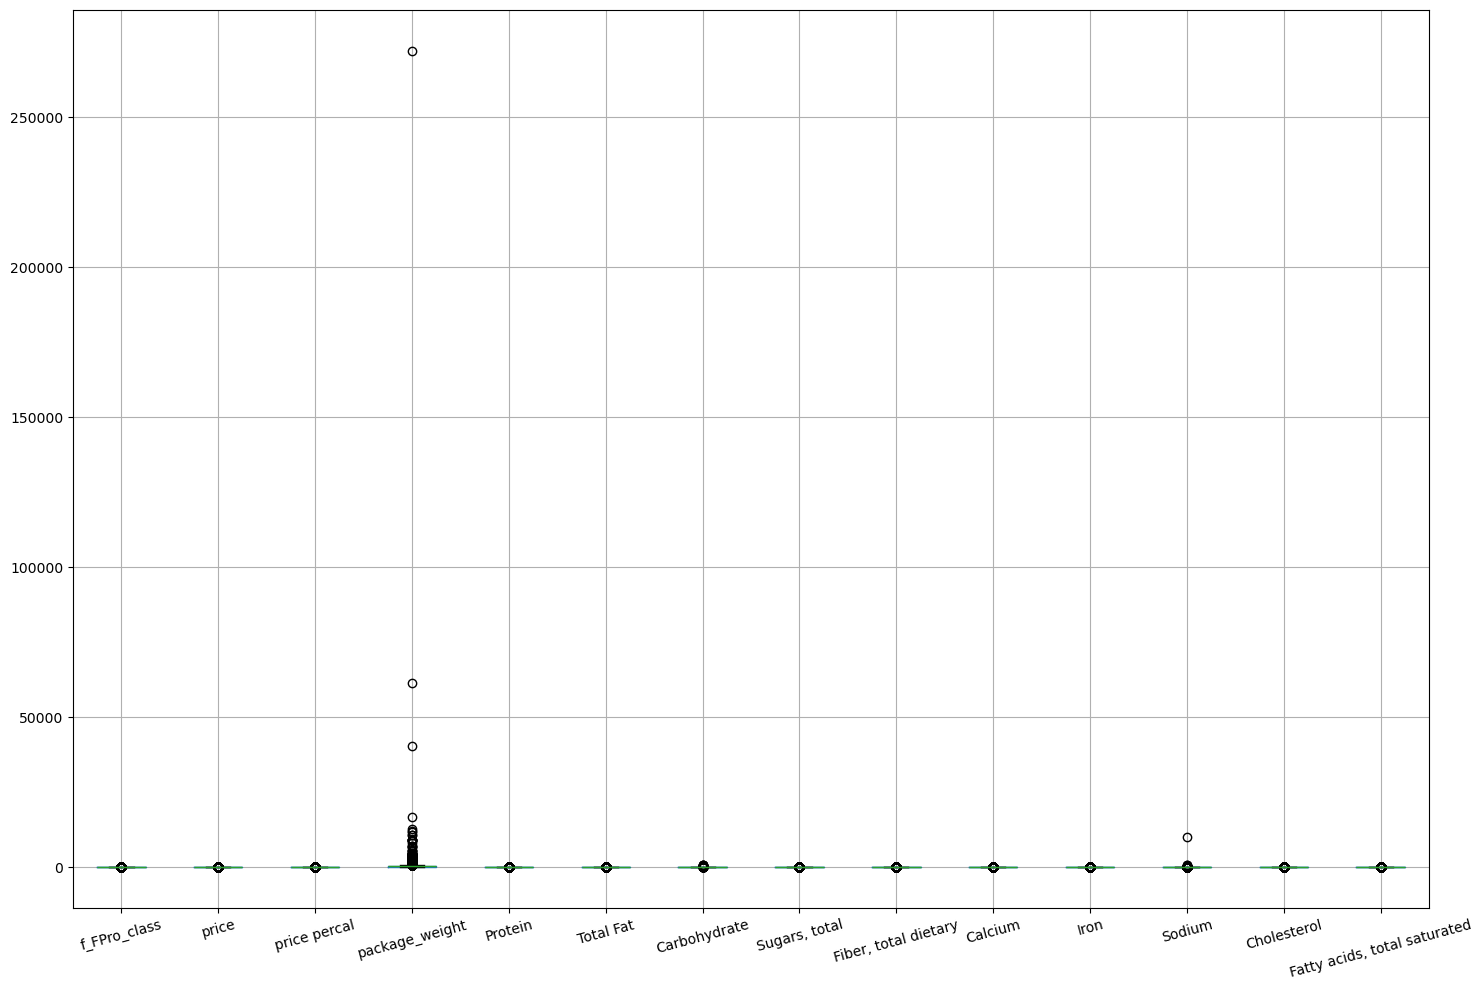

In [17]:
ax = df.boxplot(figsize=(15, 10))

ax.tick_params(axis='x', rotation=15)

plt.tight_layout()

plt.show()

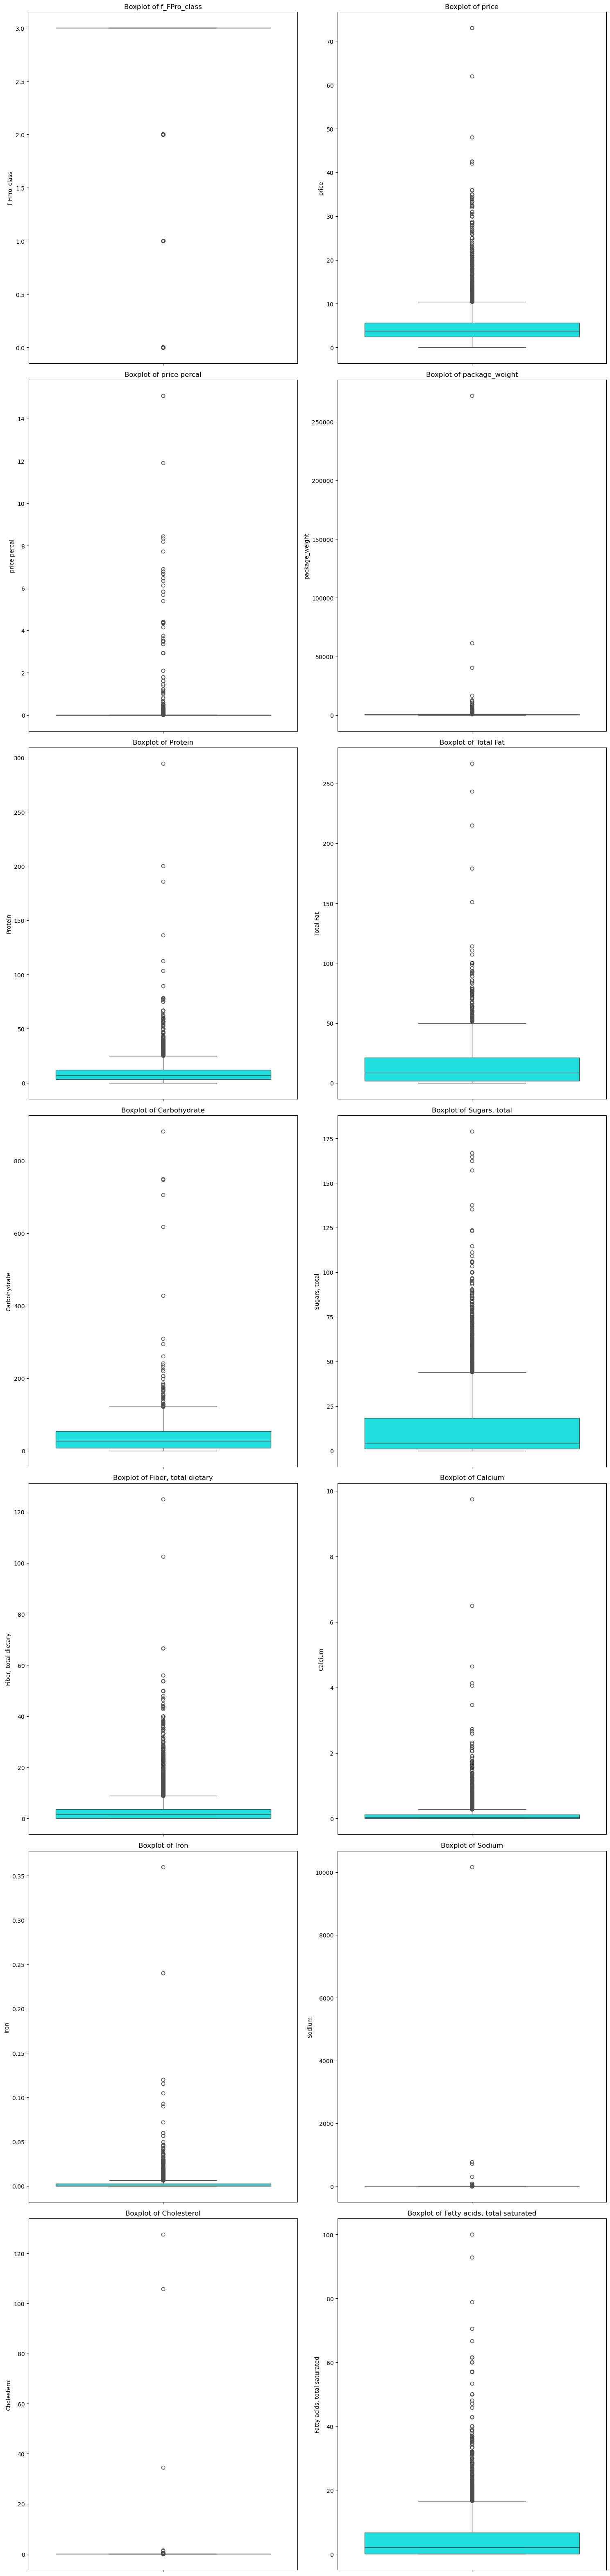

In [18]:
numeric_columns = df.select_dtypes(include=['number']).columns
n_cols = 2
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 9*n_rows))
axes = axes.flatten() if n_rows > 1 else axes

for i, col in enumerate(numeric_columns):
    if i < len(axes):
        sns.boxplot(y=df[col], ax=axes[i], color='cyan')
        axes[i].set_title(f'Boxplot of {col}')

for j in range(i+1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

=> A lot of outliers

### Histograms

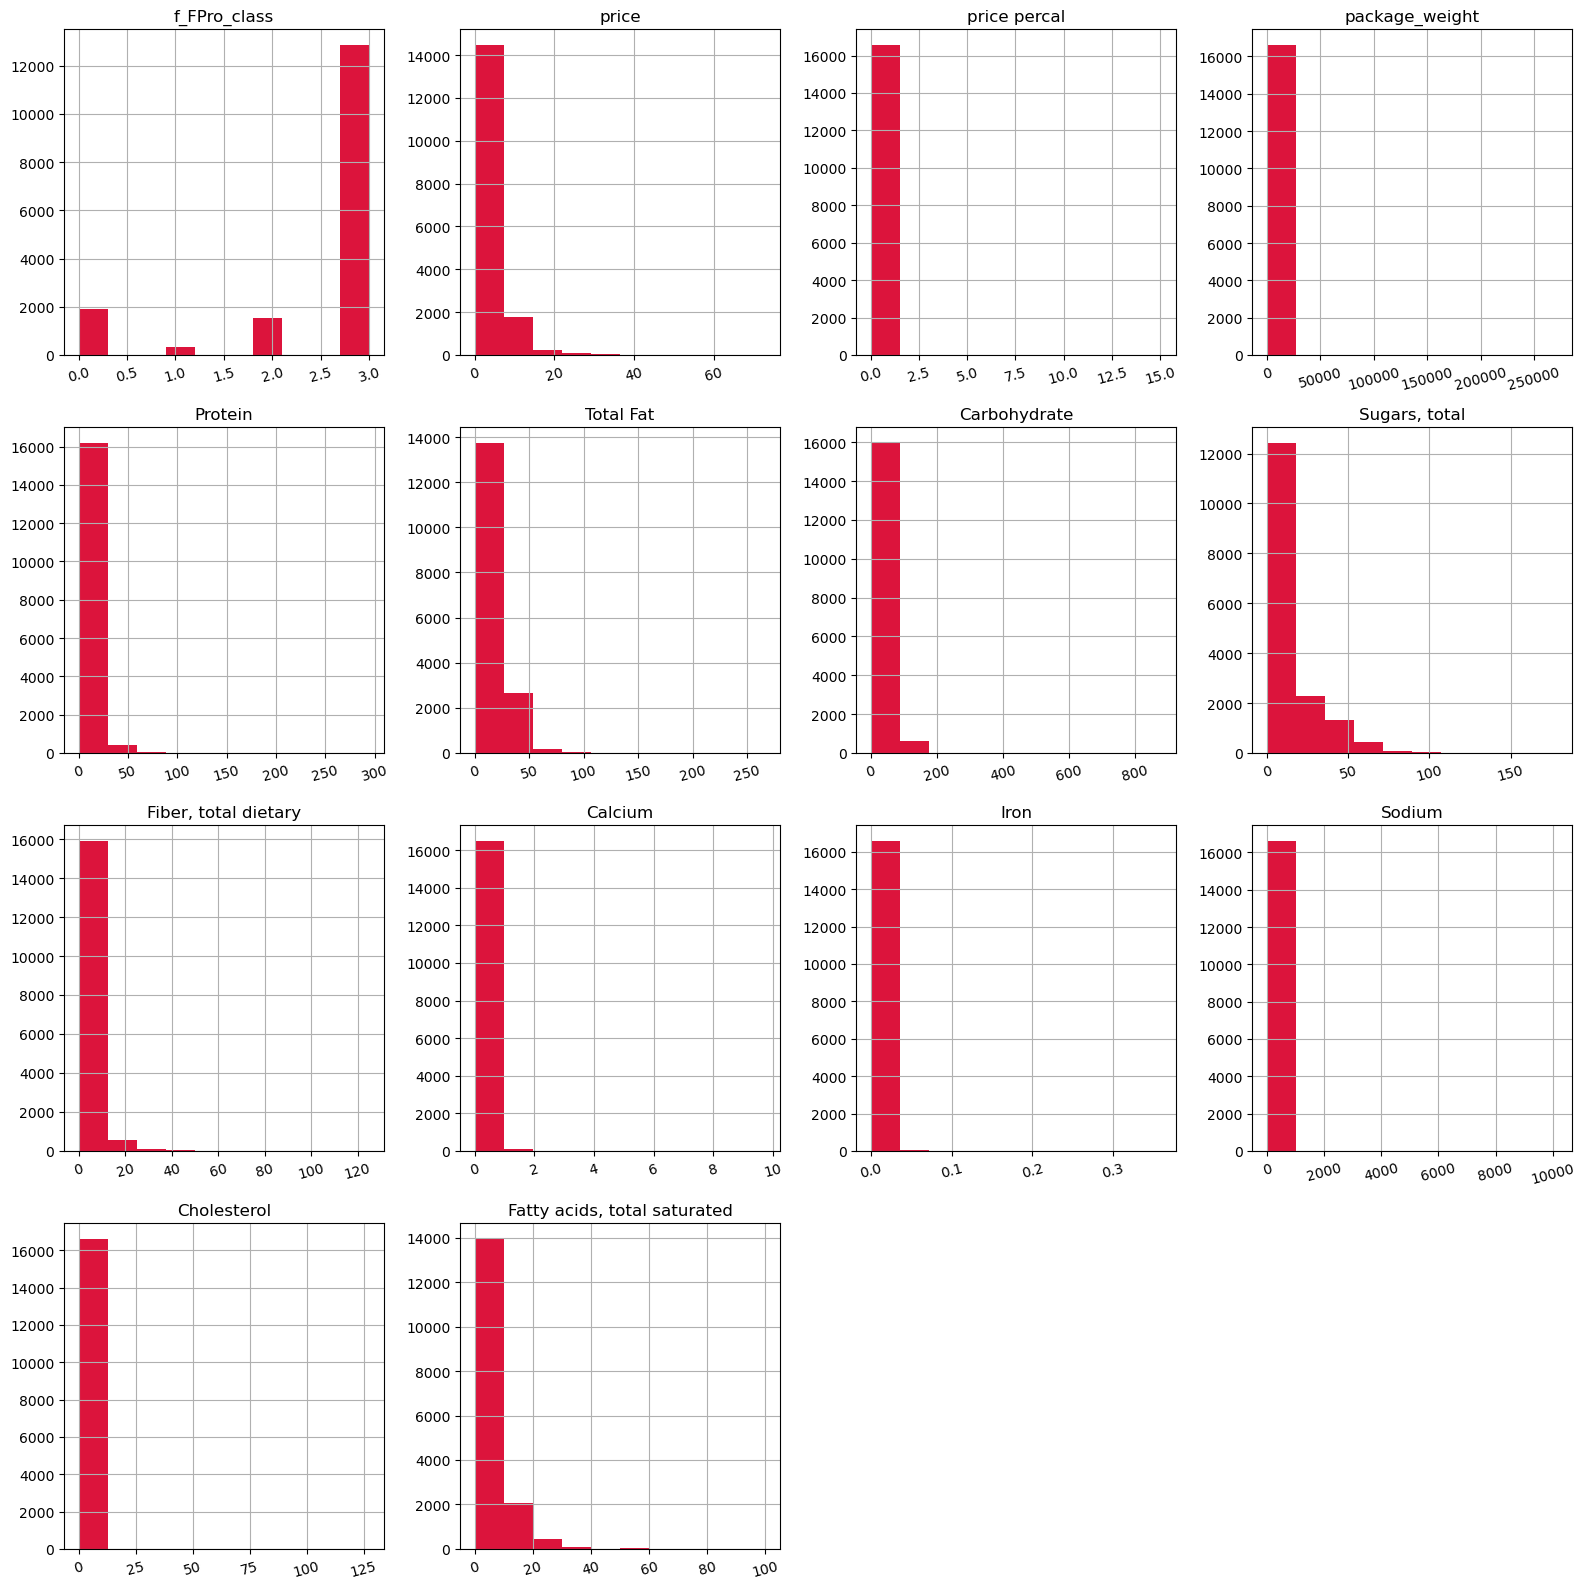

In [19]:
axes = df.hist(figsize=(16, 16), color='crimson')

for ax in axes.flatten():
    ax.tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

=> highly skewed data, most variables have small values, from 0 to 10

### Clean column names: lowercase

In [20]:
!pip install skimpy

In [21]:
from skimpy import clean_columns

df = clean_columns(df)
df.columns.tolist()

['original_id',
 'name',
 'store',
 'food_category',
 'brand',
 'f_f_pro_class',
 'price',
 'price_percal',
 'package_weight',
 'protein',
 'total_fat',
 'carbohydrate',
 'sugars_total',
 'fiber_total_dietary',
 'calcium',
 'iron',
 'sodium',
 'cholesterol',
 'fatty_acids_total_saturated']

In [22]:
df.head()

,original_id,name,store,food_category,brand,f_f_pro_class,price,price_percal,package_weight,protein,total_fat,carbohydrate,sugars_total,fiber_total_dietary,calcium,iron,sodium,cholesterol,fatty_acids_total_saturated
0,wm_43236028,Petite Carrots,Walmart,produce-beans-wf,Produce Unbranded,0,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000
1,tg_81910537,Dill-licious Salad Bowl - 5.75oz - Good &#38; Gather&#8482;,Target,produce-packaged,Good & Gather,3,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479
2,wm_909761483,"Zatarain's Cheddar Jalapeno Cornbread Mix, 12.5 oz",Walmart,baking,Zatarain's,3,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000
3,wf_icelandic-provisions-coconut-with-almonds-skyr-yogurt-44-oz-b089n69zkg,"Coconut With Almonds Skyr Yogurt, 4.4 oz",WholeFoods,dairy-yogurt-drink,Icelandic Provisions,3,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408
4,tg_47981869,Alaska Grains Kodiak Wheat Bread - 24oz,Target,bread,Alaska Grains Baking Company,3,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000


### Check duplicates

In [23]:
df.duplicated().sum()

np.int64(0)

### Check correlation

In [24]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

                             f_f_pro_class     price  price_percal  package_weight   protein  total_fat  carbohydrate  sugars_total  fiber_total_dietary   calcium      iron    sodium  cholesterol  fatty_acids_total_saturated
f_f_pro_class                     1.000000 -0.062315     -0.136569       -0.019034 -0.089428   0.046054      0.214454      0.219957            -0.062139 -0.023260 -0.041965  0.005279    -0.001947                     0.048620
price                            -0.062315  1.000000      0.100461        0.068502  0.224469   0.103939     -0.100005     -0.032910             0.090768  0.024968  0.036654 -0.006891    -0.000657                     0.068197
price_percal                     -0.136569  0.100461      1.000000       -0.007411 -0.045993  -0.060061     -0.068735     -0.045346            -0.035360 -0.024868 -0.018041 -0.000969    -0.001524                    -0.047043
package_weight                   -0.019034  0.068502     -0.007411        1.000000 -0.024468  -0.032

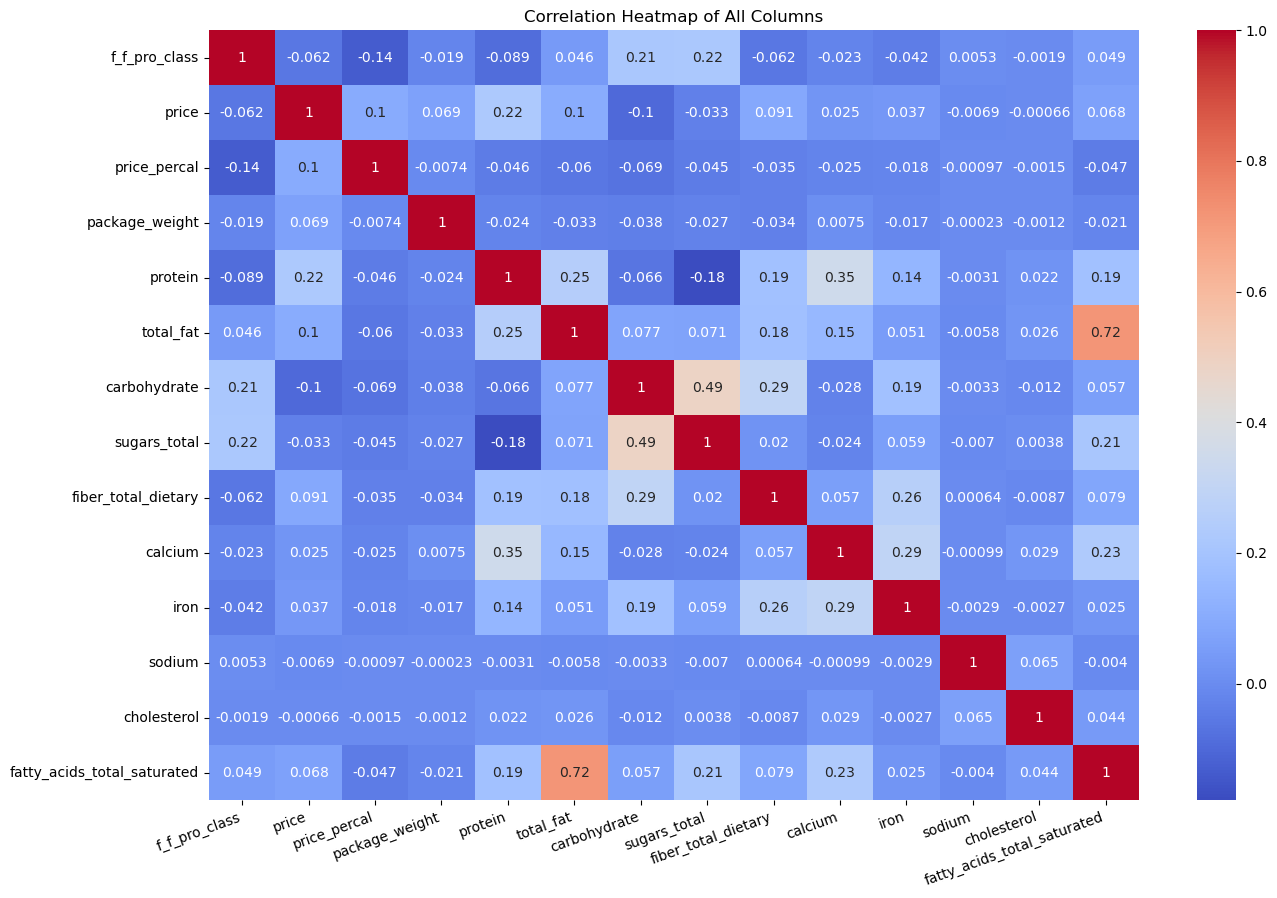

In [25]:
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap of All Columns")

ax = plt.gca()

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=20,
    horizontalalignment='right'
)

plt.show()

# 2. Data Preprocessing

## 2.1 Target Construction

### Convert target variable to binary values: 0, 1, 2 -> 1 ; 3 -> 0

In [26]:
df['target'] = np.where(df['f_f_pro_class'] == 3, 0, 1)

In [27]:
df.head()

,original_id,name,store,food_category,brand,f_f_pro_class,price,price_percal,package_weight,protein,total_fat,carbohydrate,sugars_total,fiber_total_dietary,calcium,iron,sodium,cholesterol,fatty_acids_total_saturated,target
0,wm_43236028,Petite Carrots,Walmart,produce-beans-wf,Produce Unbranded,0,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000,1
1,tg_81910537,Dill-licious Salad Bowl - 5.75oz - Good &#38; Gather&#8482;,Target,produce-packaged,Good & Gather,3,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479,0
2,wm_909761483,"Zatarain's Cheddar Jalapeno Cornbread Mix, 12.5 oz",Walmart,baking,Zatarain's,3,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000,0
3,wf_icelandic-provisions-coconut-with-almonds-skyr-yogurt-44-oz-b089n69zkg,"Coconut With Almonds Skyr Yogurt, 4.4 oz",WholeFoods,dairy-yogurt-drink,Icelandic Provisions,3,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408,0
4,tg_47981869,Alaska Grains Kodiak Wheat Bread - 24oz,Target,bread,Alaska Grains Baking Company,3,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000,0


In [28]:
df['target'].value_counts()

target
0    12870
1     3754
Name: count, dtype: int64

## 2.2 Feature Creation & Selection

In [29]:
df['store'].unique()

array(['Walmart', 'Target', 'WholeFoods'], dtype=object)

In [30]:
df['store'].value_counts()

store
Walmart       5948
WholeFoods    5640
Target        5036
Name: count, dtype: int64

In [31]:
df['food_category'].unique()

array(['produce-beans-wf', 'produce-packaged', 'baking',
       'dairy-yogurt-drink', 'bread', 'cookies-biscuit',
       'pastry-chocolate-candy', 'cheese', 'rolls-buns-wraps',
       'sauce-all', 'coffee-beans-wf', 'prepared-meals-dishes', 'cereal',
       'sausage-bacon', 'snacks-chips', 'meat-packaged',
       'ice-cream-dessert', 'snacks-bars', 'drink-juice',
       'drink-shakes-other', 'snacks-dips-salsa', 'snacks-nuts-seeds',
       'snacks-mixes-crackers', 'nuts-seeds-wf', 'jerky',
       'rice-grains-wf', 'spread-squeeze', 'dressings', 'pizza',
       'snacks-popcorn', 'breakfast', 'milk-milk-substitute',
       'pasta-noodles', 'drink-coffee', 'meat-poultry-wf', 'seafood',
       'mac-cheese', 'spices-seasoning', 'soup-stew', 'cakes',
       'pudding-jello', 'rice-grains-packaged', 'salad', 'muffins-bagels',
       'culinary-ingredients', 'baby-food', 'drink-tea', 'eggs-wf',
       'drink-soft-energy-mixes'], dtype=object)

In [32]:
df['food_category'].value_counts()

food_category
prepared-meals-dishes      1279
pastry-chocolate-candy     1053
snacks-bars                 913
cookies-biscuit             779
produce-packaged            770
snacks-mixes-crackers       744
snacks-chips                696
produce-beans-wf            635
cheese                      625
meat-packaged               595
dairy-yogurt-drink          537
cereal                      528
ice-cream-dessert           511
bread                       431
rolls-buns-wraps            416
sauce-all                   408
soup-stew                   394
dressings                   341
seafood                     330
sausage-bacon               316
drink-juice                 310
pizza                       271
cakes                       249
baking                      249
snacks-nuts-seeds           238
snacks-dips-salsa           221
breakfast                   198
milk-milk-substitute        195
spread-squeeze              190
drink-shakes-other          185
jerky                     

In [33]:
df['brand'].unique()

array(['Produce Unbranded', 'Good & Gather', "Zatarain's", ..., 'Millers',
       'Nerds', 'Milkman'], shape=(2398,), dtype=object)

### Drop unnecessary features: original_ID, name, brand, f_FPro_class

In [34]:
columns_to_drop = ['original_id', 'name', 'food_category', 'brand', 'f_f_pro_class']
df = df.drop(columns = columns_to_drop)

In [35]:
df.head()

,store,price,price_percal,package_weight,protein,total_fat,carbohydrate,sugars_total,fiber_total_dietary,calcium,iron,sodium,cholesterol,fatty_acids_total_saturated,target
0,Walmart,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000,1
1,Target,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479,0
2,Walmart,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000,0
3,WholeFoods,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408,0
4,Target,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000,0


# DATA SPLIT TO AVOID DATA LEAKAGE

In [36]:
from sklearn.model_selection import train_test_split

# PREPARE FEATURES AND TARGET
# Target column is 'target'
X = df.drop('target', axis=1)  # All columns EXCEPT the target
y = df['target']               # Only the target column

# DATA SPLIT
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y,
    stratify=y,            # MAINTAIN CLASS PROPORTION (ratio)
    test_size=0.2,         # 80% train, 20% temp (val + test)
    random_state=42        # Ensures reproducible results
)

# SECOND SPLIT: Split temp into val and test (50% each of the 20% = 10% val, 10% test)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    stratify=y_temp,       # MAINTAIN CLASS PROPORTION in val and test
    test_size=0.5,         # 50% val, 50% test (of the original 20%)
    random_state=42        # Ensures reproducible results
)

print(f"Overall dataset: {df.shape}")
print(f"Train set: {X_train.shape}")
print(f"Validation set: {X_val.shape}")
print(f"Test set: {X_test.shape}")

# CHECK CLASS DISTRIBUTION
print("\nCLASS DISTRIBUTION:")
print("Overall dataset:", y.value_counts(normalize=True))
print("Train set:", y_train.value_counts(normalize=True))
print("Validation set:", y_val.value_counts(normalize=True))
print("Test set:", y_test.value_counts(normalize=True))

# VERIFY THE SPLIT RATIOS
total_samples = len(X)
print(f"\nSPLIT VERIFICATION:")
print(f"Train: {len(X_train)/total_samples:.1%} ({len(X_train)} samples)")
print(f"Validation: {len(X_val)/total_samples:.1%} ({len(X_val)} samples)")
print(f"Test: {len(X_test)/total_samples:.1%} ({len(X_test)} samples)")

Overall dataset: (16624, 15)
Train set: (13299, 14)
Validation set: (1662, 14)
Test set: (1663, 14)

CLASS DISTRIBUTION:
Overall dataset: target
0    0.774182
1    0.225818
Name: proportion, dtype: float64
Train set: target
0    0.774194
1    0.225806
Name: proportion, dtype: float64
Validation set: target
0    0.774368
1    0.225632
Name: proportion, dtype: float64
Test set: target
0    0.773903
1    0.226097
Name: proportion, dtype: float64

SPLIT VERIFICATION:
Train: 80.0% (13299 samples)
Validation: 10.0% (1662 samples)
Test: 10.0% (1663 samples)


### Function to handle outliers

In [37]:
class IQR_Outlier_Capper(BaseEstimator, TransformerMixin):
    """
    Caps (clips) values outside of 1.5 * IQR.
    """
    def __init__(self, factor=1.5):
        self.factor = factor
        self.lower_bound_ = {}
        self.upper_bound_ = {}
        self.feature_names_in_ = None # Store input column names

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.feature_names_in_ = X.columns.tolist() # Store column names
        for col in X.columns:
            Q1 = X[col].quantile(0.25)
            Q3 = X[col].quantile(0.75)
            IQR = Q3 - Q1
            self.lower_bound_[col] = Q1 - (self.factor * IQR)
            self.upper_bound_[col] = Q3 + (self.factor * IQR)
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        # Ensure that the column order in X is the same as the fitted column order
        X = X[self.feature_names_in_]
        for col in X.columns:
            X[col] = np.where(X[col] < self.lower_bound_[col], self.lower_bound_[col], X[col])
            X[col] = np.where(X[col] > self.upper_bound_[col], self.upper_bound_[col], X[col])
        return X.values

    # !!! NEWLY ADDED METHOD !!!
    def get_feature_names_out(self, input_features=None):
        # Return the original column names
        if input_features is None:
            return np.asarray(self.feature_names_in_, dtype=object)
        else:
            return np.asarray(input_features, dtype=object)


In [38]:
all_features = X_train.columns

# Categorical variables: store (One-Hot), food_category (Target)
cat_ohe = ['store']
# cat_target = ['food_category']
cat_target = []

# Numerical variables: All remaining variables (after excluding categorical ones)
numeric_features = [f for f in all_features if f not in cat_ohe + cat_target]

### Pipeline for numerical variables (Imputer, Outlier, Scaler)

In [39]:
# 1. Pipeline for numerical variables (Imputer, Outlier, Scaler)
numeric_pipeline = SklearnPipeline(steps=[
    ('imputer', IterativeImputer(
        estimator=RandomForestRegressor(n_estimators=10, random_state=42),
        max_iter=10,
        random_state=42)),
    ('outlier_capper', IQR_Outlier_Capper(factor=1.5)),
    ('scaler', RobustScaler())
])

### Pipeline for categorical variables (One-Hot Encoding)

In [40]:
# 2. Pipeline for categorical variables (One-Hot Encoding)
categorical_ohe_pipeline = SklearnPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute with mode
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

### Pipeline for categorical variables (Target Encoding)

In [41]:
# 3. Pipeline for categorical variables (Target Encoding)
categorical_target_pipeline = SklearnPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')), # Impute with mode
    ('target', TargetEncoder())
])

### Bigger pipeline

In [42]:
# 4. ColumnTransformer (All Imputers are placed inside)
preprocessor = ColumnTransformer(
    transformers=[
        # Handle all steps for numerical variables: Impute -> Cap -> Scale
        ('num_pipe', numeric_pipeline, numeric_features),
        # Handle all steps for OHE categorical variables: Impute -> OHE
        ('cat_ohe_pipe', categorical_ohe_pipeline, cat_ohe),
        # Handle all steps for Target categorical variables: Impute -> Target Encoding
        ('cat_target_pipe', categorical_target_pipeline, cat_target)
    ],
    remainder='passthrough'
)

# 5. Final Preprocessing Pipeline (No need for IterativeImputer at the beginning anymore)
full_preprocessing_pipeline = SklearnPipeline(steps=[
    ('column_transform', preprocessor) # ColumnTransformer is sufficient
])

### Apply pipeline for preprocessing for X_train

In [43]:
# --- Rerunning FIT and Transform Process ---
print("Starting FIT Pipeline on X_train...")
full_preprocessing_pipeline.fit(X_train[all_features], y_train)
print("FIT completed.")

# 2. TRANSFORM X_train, X_val, X_test
X_train_processed = full_preprocessing_pipeline.transform(X_train[all_features])
X_val_processed = full_preprocessing_pipeline.transform(X_val[all_features])
X_test_processed = full_preprocessing_pipeline.transform(X_test[all_features])

# Visualization: Get column names after transformation
# The transformed column names will be complex (e.g., 'column_transform__num_pipe__price')
feature_names = full_preprocessing_pipeline['column_transform'].get_feature_names_out()

X_train_viz = pd.DataFrame(X_train_processed, columns=feature_names)
X_val_viz = pd.DataFrame(X_val_processed, columns=feature_names)

# Print the first 5 rows of the processed data for inspection
print("\n--- Processed X_train Data (First 5 Rows) ---")
print(X_train_viz.head())

# Check the distribution of a column after Normalization/Outlier Handling
# Example: X_train_viz['column_transform__num_pipe__price'].hist()

Starting FIT Pipeline on X_train...
FIT completed.

--- Processed X_train Data (First 5 Rows) ---
   num_pipe__price  num_pipe__price_percal  num_pipe__package_weight  num_pipe__protein  num_pipe__total_fat  num_pipe__carbohydrate  num_pipe__sugars_total  num_pipe__fiber_total_dietary  num_pipe__calcium  num_pipe__iron  num_pipe__sodium  num_pipe__cholesterol  num_pipe__fatty_acids_total_saturated  cat_ohe_pipe__store_Target  cat_ohe_pipe__store_Walmart  cat_ohe_pipe__store_WholeFoods
0        -0.871875               -0.379797                 -0.202020          -0.391286            -0.415009               -0.029391               -0.184358                      -0.261927          -0.151536       -0.290819         -0.596461                    0.0                              -0.306122                         0.0                          1.0                             0.0
1        -0.187500                0.100440                 -0.888889          -0.037559             1.965832          

### Apply pipeline for preprocessing X_val, X_test

In [44]:
# 1. Extract column names after transformation
# The transformed column names will be complex (e.g., 'column_transform__num_pipe__price')
feature_names = preprocessor.get_feature_names_out()

# 2. TRANSFORM X_train, X_val, X_test using ONLY the fitted ColumnTransformer
# Note: y_train, y_val, y_test do not change here
X_train_processed = preprocessor.transform(X_train[all_features])
X_val_processed = preprocessor.transform(X_val[all_features])
X_test_processed = preprocessor.transform(X_test[all_features])

# 3. Convert to DataFrame for easier handling (important for the next step)
X_train_processed_df = pd.DataFrame(X_train_processed, columns=feature_names)
X_val_processed_df = pd.DataFrame(X_val_processed, columns=feature_names)
X_test_processed_df = pd.DataFrame(X_test_processed, columns=feature_names)

## Handle class imbalance using SMOTE for X_train

In [45]:
# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE ONLY on the preprocessed TRAIN set
X_train_resampled, y_train_resampled = smote.fit_resample(
    X_train_processed_df, # Processed X data (DataFrame)
    y_train               # Original y_train labels
)

print("\n--- Imbalance Handling (SMOTE) ---")
print(f"Original X_train size: {X_train_processed_df.shape}")
print(f"X_train size after SMOTE: {X_train_resampled.shape}")

# Import module
from collections import Counter

# --- Size and Proportion before SMOTE ---
# y_train is the original label array/Series
class_counts_original = pd.Series(y_train).value_counts()
total_samples_original = len(y_train)

print("\n--- Class Distribution BEFORE SMOTE ---")
print(f"Total samples: {total_samples_original}")
print(class_counts_original)

# Calculate percentage
for label, count in class_counts_original.items():
    percentage = (count / total_samples_original) * 100
    print(f"Class {label}: {count} samples ({percentage:.2f}%)")

# --- Size and Proportion after SMOTE ---
# y_train_resampled is the label array/Series after SMOTE
class_counts_resampled = pd.Series(y_train_resampled).value_counts()
total_samples_resampled = len(y_train_resampled)

print("\n--- Class Distribution AFTER SMOTE ---")
print(f"Total samples: {total_samples_resampled}")
print(class_counts_resampled)

# Calculate percentage
for label, count in class_counts_resampled.items():
    percentage = (count / total_samples_resampled) * 100
    print(f"Class {label}: {count} samples ({percentage:.2f}%)")


--- Imbalance Handling (SMOTE) ---
Original X_train size: (13299, 16)
X_train size after SMOTE: (20592, 16)

--- Class Distribution BEFORE SMOTE ---
Total samples: 13299
target
0    10296
1     3003
Name: count, dtype: int64
Class 0: 10296 samples (77.42%)
Class 1: 3003 samples (22.58%)

--- Class Distribution AFTER SMOTE ---
Total samples: 20592
target
1    10296
0    10296
Name: count, dtype: int64
Class 1: 10296 samples (50.00%)
Class 0: 10296 samples (50.00%)


### Handle missing values

In [ ]:
df.isnull().sum()

,0
store,0
food_category,0
price,0
price_percal,0
package_weight,0
protein,0
total_fat,0
carbohydrate,0
sugars_total,8
fiber_total_dietary,8


In [ ]:
df[df.isnull().any(axis=1)][['food_category', 'sugars_total', 'fiber_total_dietary', 'fatty_acids_total_saturated']].head(10)

,food_category,sugars_total,fiber_total_dietary,fatty_acids_total_saturated
4761,snacks-mixes-crackers,NaN,NaN,NaN
5128,snacks-bars,NaN,NaN,NaN
7864,dairy-yogurt-drink,NaN,NaN,NaN
8482,snacks-chips,NaN,NaN,NaN
11161,pasta-noodles,NaN,NaN,NaN
13834,snacks-bars,NaN,NaN,NaN
14782,dressings,NaN,NaN,NaN
15494,seafood,NaN,NaN,NaN


#### Fill by median of each category

In [ ]:
# Fill missing values ​​according to each food_category
df_filled = df.copy()

for col in ['sugars_total', 'fiber_total_dietary', 'fatty_acids_total_saturated']:
    # Calculate median for each category
    category_medians = df.groupby('food_category')[col].median()

    # Fill missing values ​​with the median of the corresponding category
    for category in df['food_category'].unique():
        mask = (df['food_category'] == category) & (df[col].isnull())
        if mask.any():
            df_filled.loc[mask, col] = category_medians[category]

#### Check distributions and values after imputation

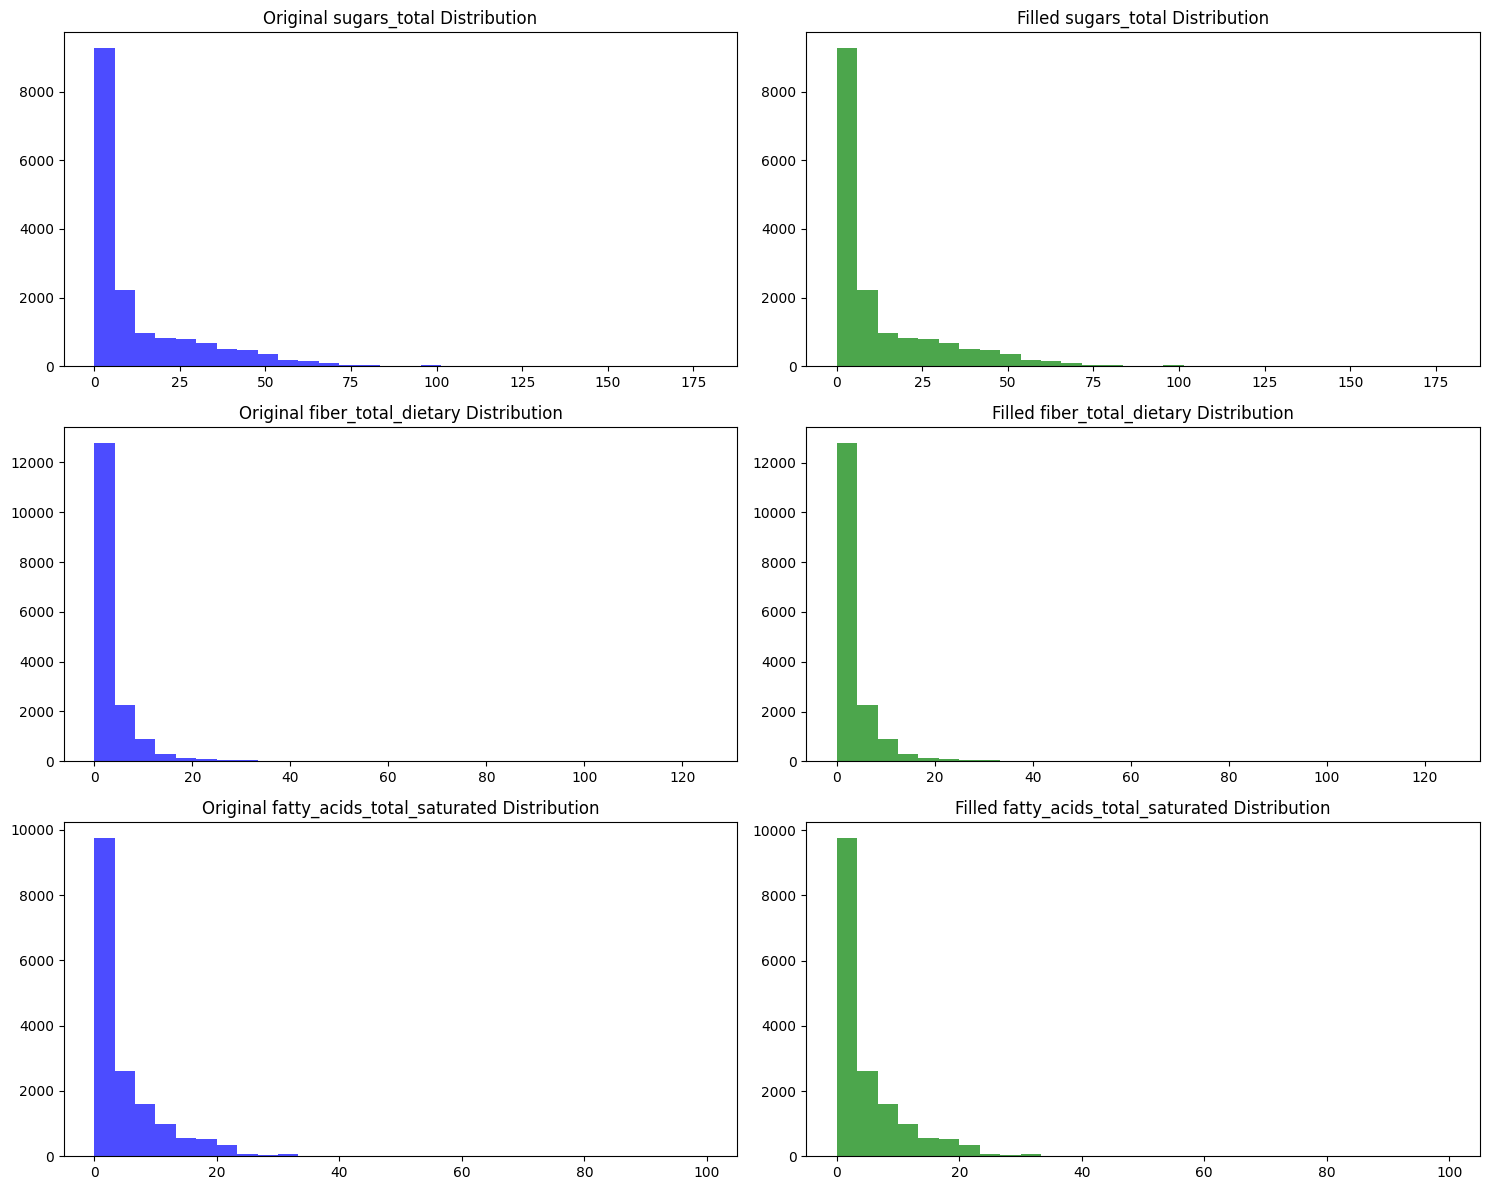

In [ ]:
# Compare distribution before and after filling missing values
original_data = df.dropna()
filled_data = df_filled

fig, axes = plt.subplots(3, 2, figsize=(15, 12))

for i, col in enumerate(['sugars_total', 'fiber_total_dietary', 'fatty_acids_total_saturated']):
    # Original Distribution (no missing values)
    axes[i, 0].hist(original_data[col], bins=30, alpha=0.7, color='blue', label='Original')
    axes[i, 0].set_title(f'Original {col} Distribution')

    # Distribution after filling missing values
    axes[i, 1].hist(filled_data[col], bins=30, alpha=0.7, color='green', label='After Fill')
    axes[i, 1].set_title(f'Filled {col} Distribution')

plt.tight_layout()
plt.show()

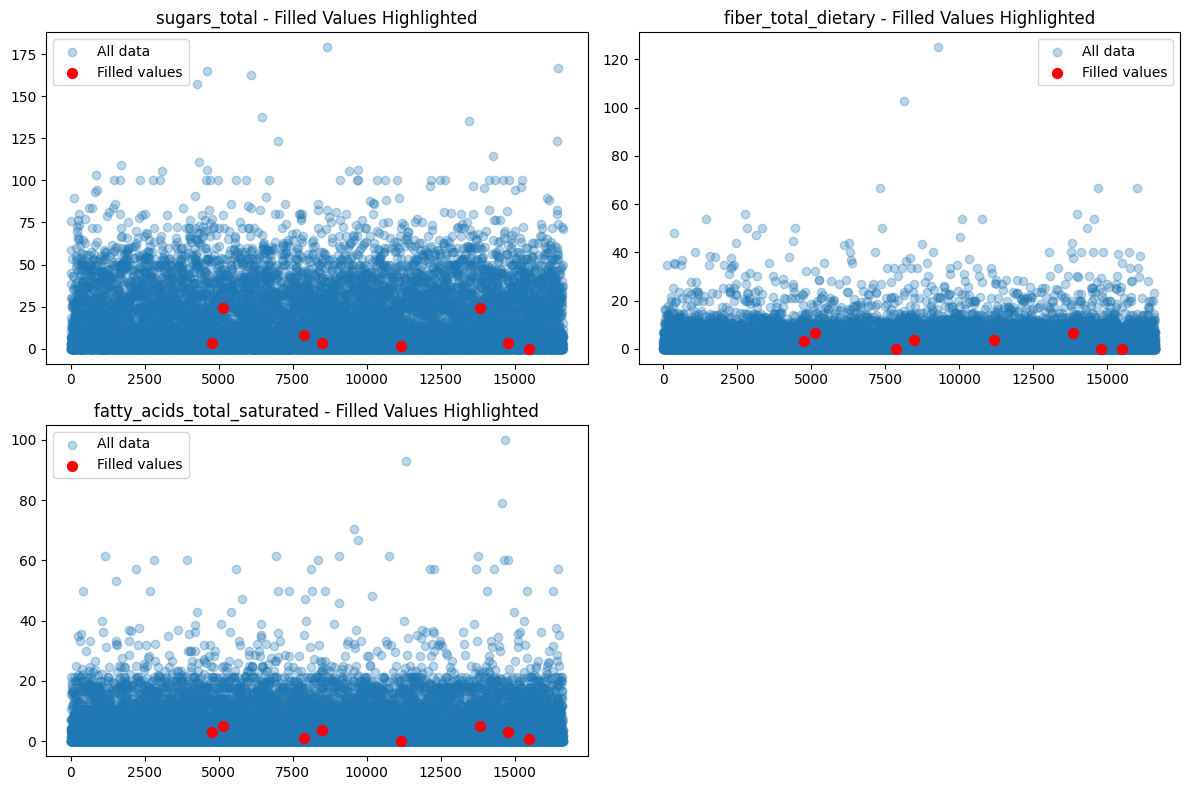

In [ ]:
# Visualize the filled values
filled_indices = df[df['sugars_total'].isnull()].index

plt.figure(figsize=(12, 8))
for i, col in enumerate(['sugars_total', 'fiber_total_dietary', 'fatty_acids_total_saturated'], 1):
    plt.subplot(2, 2, i)

    # Plot all data
    plt.scatter(df_filled.index, df_filled[col], alpha=0.3, label='All data')

    # Highlight the filled values
    plt.scatter(filled_indices, df_filled.loc[filled_indices, col],
                color='red', s=50, label='Filled values', zorder=5)

    plt.title(f'{col} - Filled Values Highlighted')
    plt.legend()

plt.tight_layout()
plt.show()

### Encode categorical features

In [ ]:
df_filled.head()

,store,food_category,price,price_percal,package_weight,protein,total_fat,carbohydrate,sugars_total,fiber_total_dietary,calcium,iron,sodium,cholesterol,fatty_acids_total_saturated,target
0,Walmart,produce-beans-wf,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000,1
1,Target,produce-packaged,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479,0
2,Walmart,baking,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000,0
3,WholeFoods,dairy-yogurt-drink,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408,0
4,Target,bread,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000,0


#### One Hot Encoding for store

In [ ]:
store_encoded_df = pd.get_dummies(df_filled[['store']], prefix='store', drop_first=True)

store_encoded_df.columns = store_encoded_df.columns.str.lower()

df_filled = pd.concat([df_filled, store_encoded_df], axis=1)

df_filled = df_filled.drop('store', axis=1)

In [ ]:
df_filled.head()

,food_category,price,price_percal,package_weight,protein,total_fat,carbohydrate,sugars_total,fiber_total_dietary,calcium,iron,sodium,cholesterol,fatty_acids_total_saturated,target,store_walmart,store_wholefoods
0,produce-beans-wf,1.88,0.013429,340.194000,1.175800,0.000000,12.228317,5.878998,2.351599,0.030571,0.000423,0.064199,0.000000,0.000000,1,True,False
1,produce-packaged,3.49,0.010575,163.009625,9.815951,15.337423,4.785276,2.453988,0.613497,0.079755,0.000663,0.515337,0.030675,4.294479,0,False,False
2,baking,1.97,0.001516,354.368750,6.666667,0.000000,98.333333,30.000000,0.000000,0.000000,0.003600,0.760000,0.000000,0.000000,0,True,False
3,dairy-yogurt-drink,1.99,0.011056,124.737800,8.818498,7.215134,12.297796,7.215134,0.000000,0.104219,0.000000,0.044894,0.020042,4.008408,0,False,True
4,bread,2.99,0.001875,637.863750,0.000000,3.125000,41.718750,3.125000,3.125000,0.071875,0.003125,0.421875,0.000000,0.000000,0,False,False


### Normalize features

In [ ]:
# from sklearn.preprocessing import RobustScaler

# numerical_cols = [
#     'price', 'price_percal', 'package_weight', 'protein', 'total_fat',
#     'carbohydrate', 'sugars_total', 'fiber_total_dietary', 'calcium',
#     'iron', 'sodium', 'cholesterol', 'fatty_acids_total_saturated'
# ]

# # Initialize RobustScaler
# scaler = RobustScaler()

# # Apply RobustScaler to the numerical columns
# df_filled[numerical_cols] = scaler.fit_transform(df_filled[numerical_cols])

# df_filled.head()

## 2.3 Handling Class Imbalance

### Oversampling

### Undersampling

### SMOTE

In [ ]:
# from imblearn.over_sampling import SMOTE
# X = df.drop('label', axis=1)
# y = df['label']

# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X, y)

# print('Trước khi oversample:', y.value_counts())
# print('Sau khi oversample:', y_res.value_counts())


# 3. Classification models

## Baseline Model

## Model Building

### Decision Tree

### Random Forest

## Model Selection & Evaluation

### Data Split

### Random Seed

### Hyperparameter Tuning

## Evaluation metrics

### Accuracy

### Precision

### Recall

### F1 Score

### ROC-AUC

# 4. Outlier Detection

## Clustering

## Elbow Method